# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
# EXAMPLE PYTHON CELL

df = pd.read_csv('housing_data.csv')
df

,zip,population,borough,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty
0,11368,112088,QUEENS,76.49,11.60,0.09,7.12,3.73,0.00,0.37,0.60,19.69
1,11385,107796,QUEENS,45.05,6.46,0.03,1.77,45.28,0.00,0.32,1.09,10.68
2,11211,103123,BROOKLYN,24.13,5.53,0.19,3.56,64.24,0.02,0.29,2.05,25.22
3,11208,101313,BROOKLYN,40.58,6.01,0.03,48.89,2.71,0.00,0.76,1.02,25.68
4,10467,101255,BRONX,52.08,5.68,0.35,30.43,9.24,0.02,0.76,1.44,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...
184,10464,4531,BRONX,42.02,5.01,0.00,0.02,52.50,0.00,0.44,0.00,7.11
185,10004,3335,MANHATTAN,3.24,29.06,0.00,3.96,59.28,0.51,1.05,2.91,1.32
186,10006,3092,MANHATTAN,10.83,16.04,0.00,3.20,64.52,0.00,1.68,3.72,3.36
187,10162,1486,MANHATTAN,12.38,4.85,0.00,0.00,79.48,0.00,0.00,3.30,0.00


### Import packages

In [7]:
%%R

require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


**Another way to import a package**

Note that sometimes you might see 

```R
library('tidyverse')
```

that also imports a library just the same as `require`

**A note about tidyverse**

The [Tidyverse](https://www.tidyverse.org/packages/) package is actually a bunch of other packages put together. So sometimes, you might see something like

```R
require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')
```

This also achieves the same purpose, but sometimes we just import the pakcages we need instead of the whole tidyverse.




### Read Data


This uses a function in the readr package to read a CSV file. Check out all the other cool things readr can do (like read from an excel file or a google doc)

https://readr.tidyverse.org/

In [8]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

Notice that the assignment operator is `<-` rather than `=`. Actually, both work. Check out this really angry person's guide to R syntax. There are a LOT of punctuation marks in R.

![Screenshot%202023-01-20%20at%2011.47.03%20AM.png](images/r-assignment-operator.png)

source: http://arrgh.tim-smith.us/syntax.html

# ggplot2 
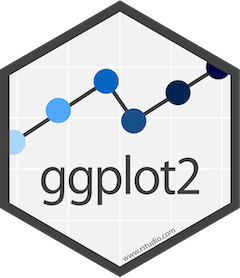


Wahoo! Those are the basics. Now let's plot some **univariate** distributions in ggplot.

### Histogram

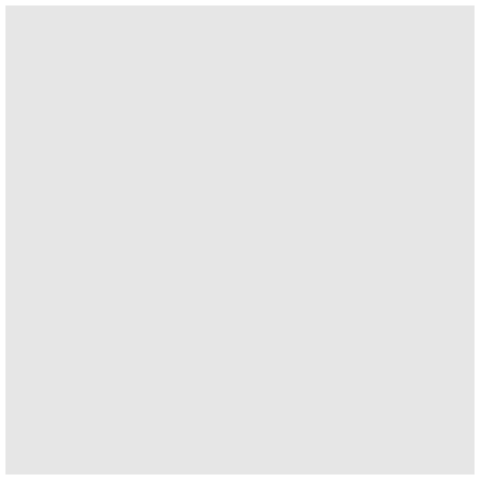

In [9]:
%%R 

# Plot
ggplot(df)

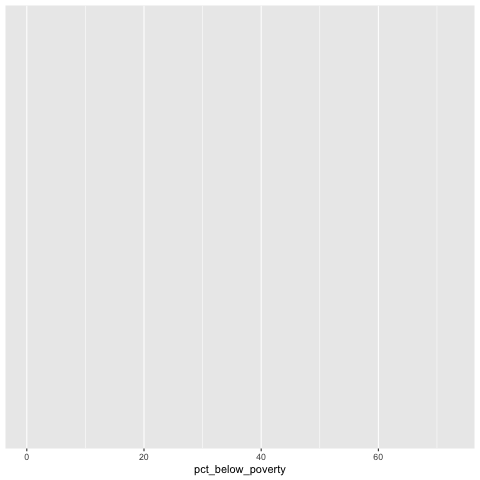

In [10]:
%%R 

# Plot + 
# Aesthetics
ggplot(df) +
    aes(x=pct_below_poverty) 


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


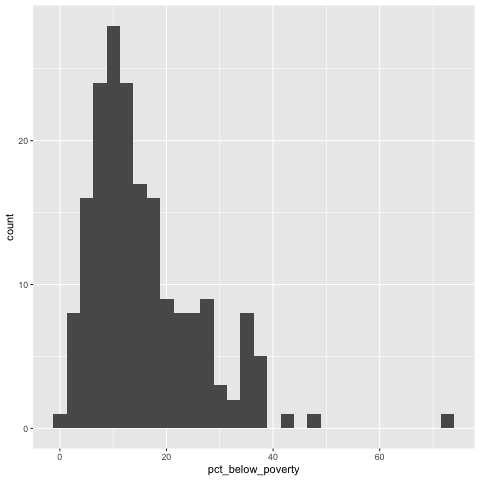

In [28]:
%%R 

# Plot +
# Aesthetics + 
# Geom
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram()

# PT INTERPRETING: This shows the spread of the percentage of those living below the poverty line across all zipcodes. Most zipcodes have a %below_poverty of around 10%. There are a crazy outlier with >70% below poverty. Some neighbourhoods have >40% below poverty too, which is worth a closer look.

In [ ]:
%%R

install.packages("ggthemes")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


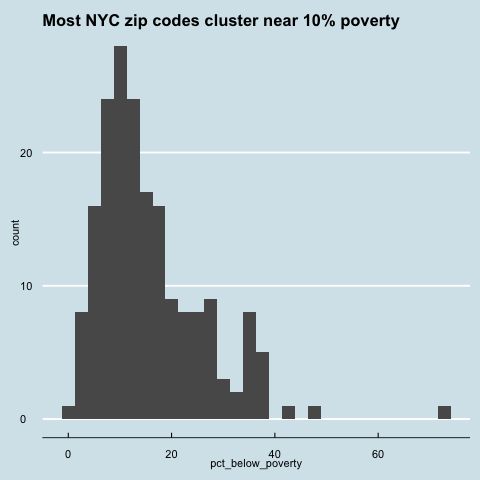

In [60]:
%%R 
library(ggthemes)

# Plot +
# Aesthetics + 
# Geom + 
# Theme
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() +
    ggtitle("Most NYC zip codes cluster near 10% poverty") +
    theme_economist()

**👉 Try It**

Here is an example of a histogram (above), and the documentation for geom_histogram (link below). Read the documentation and adjust the bin sizes (there are two ways to do this)

https://ggplot2.tidyverse.org/reference/geom_histogram.html

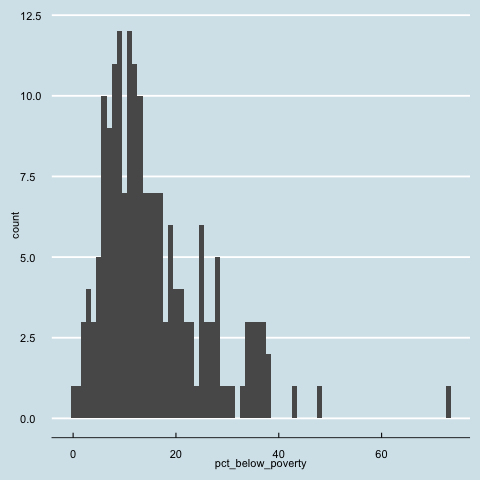

In [62]:
%%R
# copy/paste the code from the cell above
# and then make your modifications to answer
# "Try It" question

# Plot +
# Aesthetics + 
# Geom + 
# Theme
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram(binwidth = 1) +
    theme_economist()

# Key diff between bins and binwidth:

# ✅ bins → “How many bars do I want?”
# Think: “Divide the data into 30 pieces.”

# ✅ binwidth → “How wide should each bar be?”
# Think: “Each bar represents a 2-percentage-point poverty range.”

# Serious data people prefer binwidth because it forces you to answer: 👉 What unit matters in this phenomenon?
# e.g. Income → maybe $5k bins // Age → 5-year cohorts // Poverty rate → 1–2 percentage points

# The hidden danger of bins is that ggplot will pick a width based on the number of buckets that you want.
# e.g. A width of 3.47. What does a 3.47-percentage-point poverty bucket mean?

### Dotplot

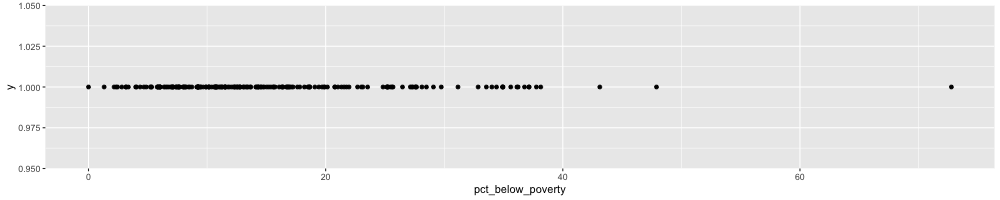

In [71]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point() 

**👉 Try It**

Here is an example of a dotplot. It's super hard to read, check out some ggplot documentation and see if you can figure out how to make the dots bigger. Also, let's make them less opaque (more transparant) so that we can see where they overlap.



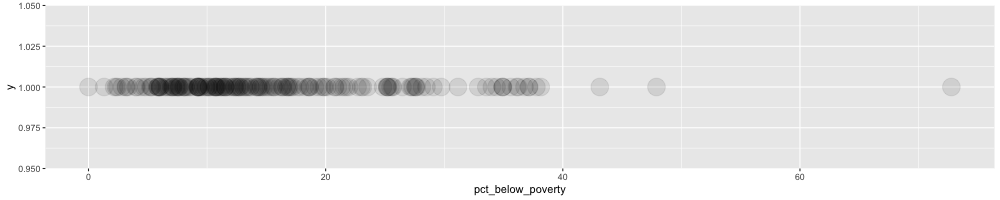

In [79]:
%%R -w 1000 -h 200

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Try It" question

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point(alpha = 1/10, size = 8) 

**👉 Bonus**:  what does `geom_rug()` do? 
1. try applying it to the above chart 
2. and then google the offical ggplot documentation for it

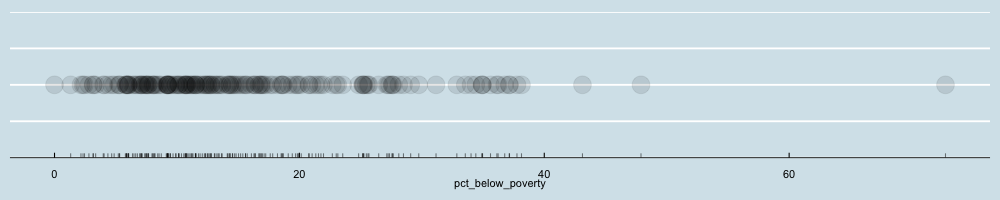

In [ ]:
%%R -w 1000 -h 200

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Bonus" question

# geom_rug() creates "Rug plots in the margins" 
# DEFINITION: A rug plot is a compact visualisation designed to supplement a 2d display with the two 1d marginal distributions. Rug plots display individual cases so are best used with smaller datasets.

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point(alpha = 1/10, size = 8) +
    geom_rug(alpha = 1/2, sides="b") +
    theme_economist() +
    theme(  # I wanted to remove the y-axis because the numbers there didn't make sense.
        axis.text.y = element_blank(),   # removes numbers
        axis.ticks.y = element_blank(),  # removes tick marks
        axis.title.y = element_blank()   # removes label
    )

### Dotplot (with jitter)

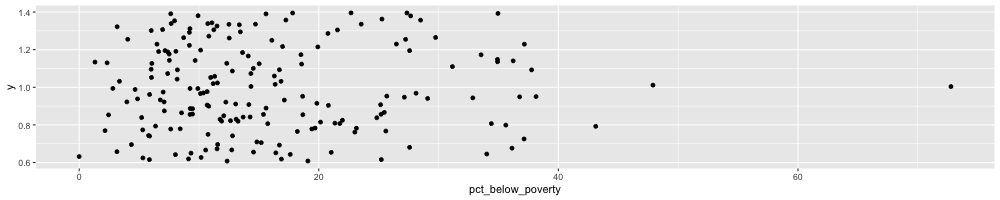

In [ ]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter()

**👉 Try It**

Here is an example of a dotplot (with jitter). It's a bit easier to read, but it's hard to make sense of since the y axis is meaningless. Read some documentation and learn how to:

- Add a **title** and **subtitle** that helps explain what story this data is telling. <br/>
    (_Remember, use a narrative title and a descriptive subtitle. The title should tell a story, the subtitle should say what the data is exactly._)


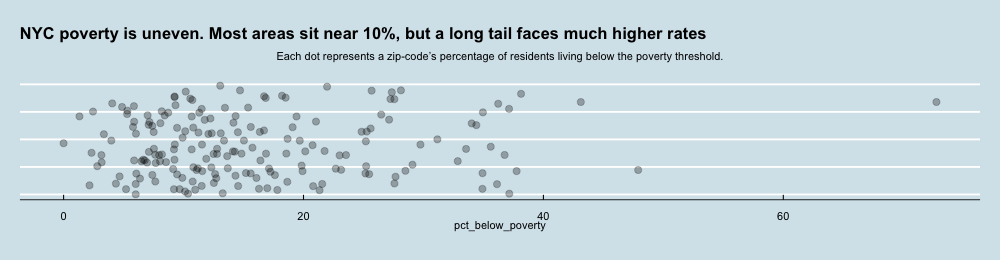

In [ ]:
%%R -w 1000 -h 260

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Try It" question

# DEFINITION: Jitter geom adds a small amount of random variation to the location of each point, and is a useful way of handling overplotting caused by discreteness in smaller datasets.

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter(height = 0.1, alpha = 0.3, size = 3) + 
    theme_economist() +
    theme(  # I wanted to remove the y-axis because the numbers there didn't make sense.
        axis.text.y = element_blank(),   # removes numbers
        axis.ticks.y = element_blank(),  # removes tick marks
        axis.title.y = element_blank(),   # removes label
        plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
        plot.title = element_text(margin = margin(b = 10)), # pushes the subtitle down from the title
        plot.subtitle = element_text(margin = margin(b = 20)) # pushes the chart down from the subtitle
    ) +
    labs(title = "NYC poverty is uneven. Most areas sit near 10%, but a long tail faces much higher rates", subtitle = "Each dot represents a zip-code’s percentage of residents living below the poverty threshold.")



**👉 Bonus**
- Remove the y axis labels (and text)
- Improve the text on the X axis label
- Change the default theme, explain why you picked the one you picked.

In [ ]:
%%R
install.packages("remotes")   # or devtools
# Install ThemePark from GitHub
remotes::install_github("MatthewBJane/ThemePark")

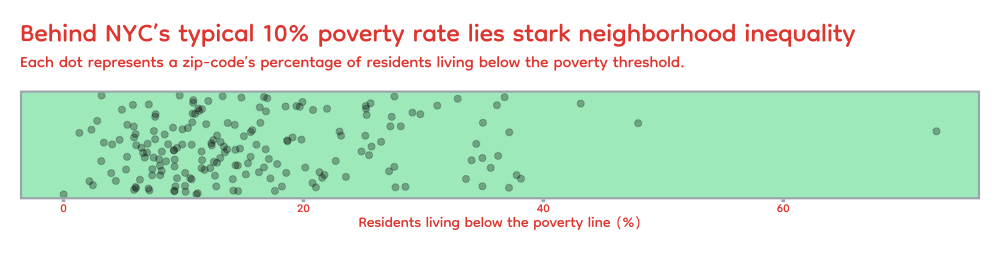

In [ ]:
%%R -w 1000 -h 260
library(ThemePark)

# copy/paste the code from the cell above
# and then make your modifications to answer
# "Bonus" question

# PT: Oh, I've already removed the y-axis labels above. Will improve text on X-axis label and select different theme to continue experimenting.

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter(height = 0.1, alpha = 0.3, size = 3) + 
    theme_futurama() + # picked this theme because it's pretty clean looking despite the whacky theme library it came from... (was exploring) and I also like that it draws a box around the jitter dots, which subtly signals that the placement of the dots don't really matter. Focuses readers on the intensity of the dots across the spectrum. I also like cowplot, except that I don't like the x-axis showing up by default.
    theme(  
        axis.text.y = element_blank(),   # removes numbers
        axis.ticks.y = element_blank(),  # removes tick marks
        axis.title.y = element_blank(),   # removes label
        plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
        plot.title = element_text(size = 40, margin = margin(b = 10)), # pushes the subtitle down from the title
        plot.subtitle = element_text(size = 25, margin = margin(b = 20)) # pushes the chart down from the subtitle
    ) +
    labs(title = "Behind NYC’s typical 10% poverty rate lies stark neighborhood inequality", # rewritten for brevity
    subtitle = "Each dot represents a zip-code’s percentage of residents living below the poverty threshold.", 
    x = "Residents living below the poverty line (%)"
    )


### Density Plot

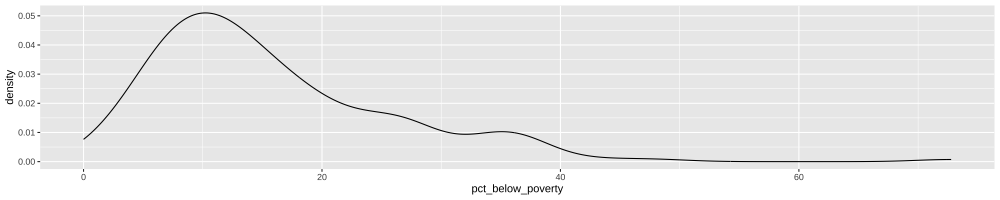

In [204]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density()

> Density Plot is the continuous and smoothed version of the Histogram estimated from the data. It is estimated through Kernel Density Estimation.

Source: https://www.geeksforgeeks.org/histograms-and-density-plots-in-python/


👉 Try It

This one is entirely theoretical. Google around and then take your best shot at answering the following questions:

1) When might you want to use a density plot versus a histogram?

> We use density plots when there is:
> 1. A critical mass of data points. If data is sparse, then the bumps in density might not be real or meaningful. Cause smoothing distortion exists in sets where there are few data points.
> 2. A need to highlight the dominant clusters, or more obviously reveal where bi- or multi- modality exists in other words. 
> 3. A need to figure out intensity of skew.
> 4. A need to highlight the long inequality tail... I personally think this plot sensitize readers more to bumps than the long tails however.
    
2) What is Kernel Density Estimation and how does it work?
    
> It is a way to estimate the shape of a distribution by smoothing individual data points into a continuous curve. Instead of grouping data into fixed bins like a histogram, it works by placing a small smooth curve at each point (called kernels) and adds them together, making patterns such as clusters and tails easier to see.

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



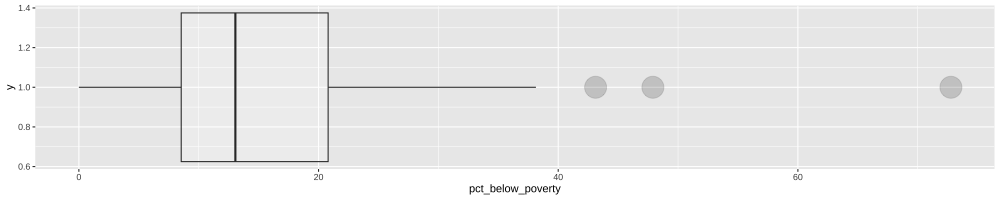

In [205]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10)

Box and whisker plots aren't super easy to read. We don't always use them in reader-facing visualizations, but you'll find them a lot in scientific papers. Box and whisker plots help draw attention to outliers in relation to the median and interquartile range of the data. 

##### Interpreting a Boxplot
![](images/boxplot-image.png)
> **Not all boxplots are created equal!**
>
>"Not all boxplots are created equal. There are many different ways in which quantiles can be defined. For example, some will compute a quantile as (i−0.5)/n
 where i
 is the nth element of the batch of data and n
 is the total number of elements in that batch. This is the method implemented by Bill Cleveland and we will refer to this method as Cleveland’s quantile method. This also happens to be the method implemented by the base’s boxplot function which explains the different boxplot output compared to ggplot_boxplot in our working example:


source: https://mgimond.github.io/ES218/Week05a.html

**👉 Try It**

Our box and whisker plot is showing three outliers with very high poverty rates. See if you can:
- figure out how to annotate those so that we know which zipcodes they are
- add a title and subtitle explaining to the reader what they're looking at

**👉 Bonus**
- Can you also annotate which borough the outliers are in?

In [225]:
%%R

# STEP 1: Recompute outliers explicitly in the data.

# Compute quartiles
q <- quantile(df$pct_below_poverty, probs = c(0.25, 0.75), na.rm = TRUE)
iqr <- q[2] - q[1]
upper_cutoff <- q[2] + 1.5 * iqr

# Identify outliers
outliers <- df %>%
  filter(pct_below_poverty > upper_cutoff)

outliers

# A tibble: 3 × 12
    zip population borough pct_hispanic_or_latino pct_asian
  <dbl>      <dbl> <chr>                    <dbl>     <dbl>
1 10454      37212 BRONX                     67.8      0.24
2 10474      12179 BRONX                     62.4      0.17
3 11430        206 QUEENS                    33.0      2.91
# ℹ 7 more variables: pct_american_indian_and_alaska_native <dbl>,
#   pct_black_or_african_american <dbl>, pct_white <dbl>,
#   pct_native_hawaiian_and_other_pacific_islander <dbl>,
#   pct_some_other_race <dbl>, pct_two_or_more_races <dbl>,
#   pct_below_poverty <dbl>


In [246]:
%%R

# make zip a character label (safe habit)
df <- df %>% mutate(zip = as.character(zip))

# if you already have this tibble, assign it to `outliers`
outliers <- df %>%
  filter(zip %in% c("10454", "10474", "11430")) %>%
  mutate(
    y = 1,
    label = paste0(zip, " (", borough, ")")
  )

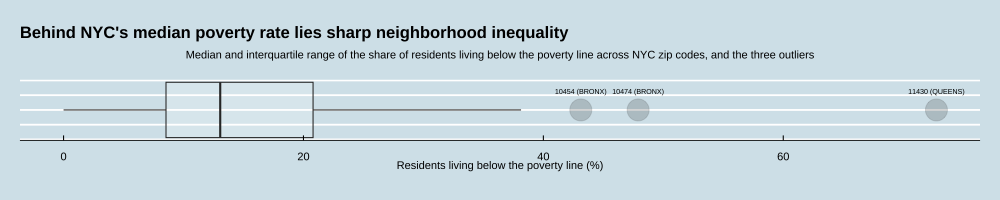

In [248]:
%%R -w 1000 -h 200

# STEP 2: Plot the box plot + annotate ZIP codes

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10) +
    geom_text(
    data = outliers,
    aes(x = pct_below_poverty, y = y, label = label),
    nudge_y = 0.25,     # pushes text slightly upward
    hjust = 0.5,          # left-align label
    size = 2.5
  ) +
    theme_economist() +
    labs(title = "Behind NYC's median poverty rate lies sharp neighborhood inequality", # rewritten for box and whisker plot
    subtitle = "Median and interquartile range of the share of residents living below the poverty line across NYC zip codes, and the three outliers", 
    x = "Residents living below the poverty line (%)"
    ) +
    theme(  
        axis.text.y = element_blank(),   # removes numbers
        axis.ticks.y = element_blank(),  # removes tick marks
        axis.title.y = element_blank(),   # removes label
        plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
        plot.title = element_text(margin = margin(b = 10)), # pushes the subtitle down from the title
        plot.subtitle = element_text(margin = margin(b = 20)) # pushes the chart down from the subtitle
    )    

### Violin Plot

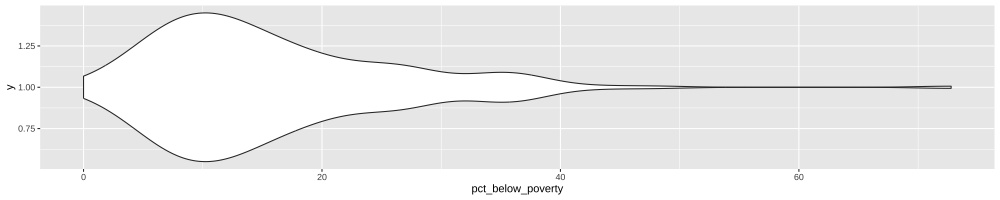

In [249]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin()

**👉 Try It**

Violin plots are great in that they help the reader to see nuances in the density a bit better than the box and whisker plot. However, they can be hard to interpret. Showing the dots in/on the violin plot can help.

See if you can find a way to plot the dots in or on the violin plot to help the reader better understand what they're looking it.

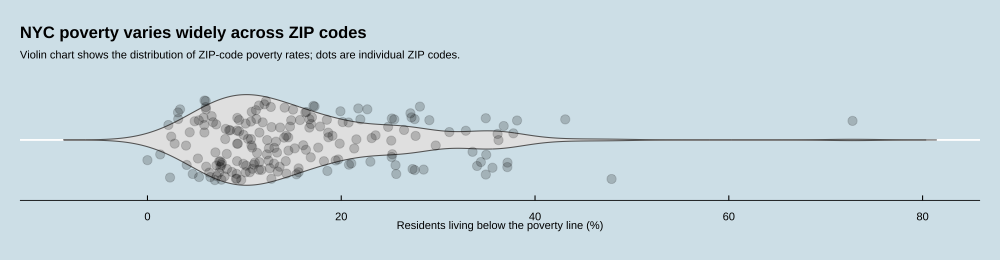

In [282]:
%%R -w 1000 -h 260

ggplot(df, aes(x = "", y = pct_below_poverty)) +
  geom_violin(trim = FALSE, fill = "grey90", colour = "grey40") +
  geom_jitter(alpha = 0.2, size = 4) +
  coord_flip() +
  theme_economist() +
  labs(
    title = "NYC poverty varies widely across ZIP codes",
    subtitle = "Violin chart shows the distribution of ZIP-code poverty rates; dots are individual ZIP codes.",
    x = NULL,
    y = "Residents living below the poverty line (%)"
  ) +
  theme(
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20),
    plot.title = element_text(margin = margin(b = 10), hjust = 0),
    plot.subtitle = element_text(margin = margin(b = 20), hjust = 0)
  )

### Beeswarm 
(this requires installing a package)

https://github.com/eclarke/ggbeeswarm

In [ ]:
%%R

install.packages('ggbeeswarm')

**👉 Try It (Bonus!)**

Install the package above and show the density as a beeswarm rather than just a jitter.


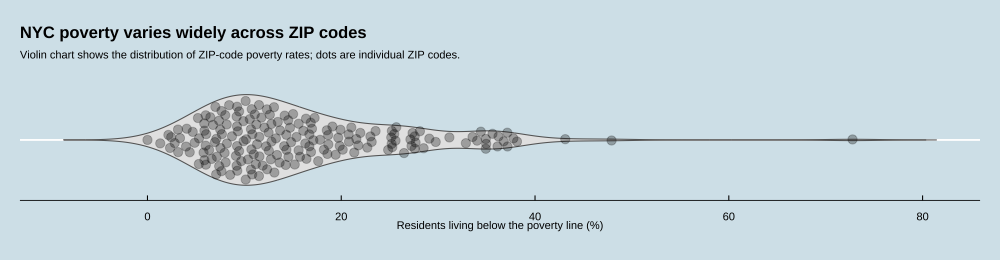

In [283]:
%%R -w 1000 -h 260
library(ggbeeswarm)

ggplot(df, aes(x = "", y = pct_below_poverty)) +
  geom_violin(trim = FALSE, fill = "grey90", colour = "grey40") +
  geom_quasirandom(alpha = 0.3, size = 4) +
  coord_flip() +
  theme_economist() +
  labs(
    title = "NYC poverty varies widely across ZIP codes",
    subtitle = "Violin chart shows the distribution of ZIP-code poverty rates; dots are individual ZIP codes.",
    x = NULL,
    y = "Residents living below the poverty line (%)"
  ) +
  theme(
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20),
    plot.title = element_text(margin = margin(b = 10), hjust = 0),
    plot.subtitle = element_text(margin = margin(b = 20), hjust = 0)
  )